<img src="img/Insurance.jpg" width="1600" height="450"/>
<h1>Insurance Case</h1>



Source: https://afia.ae/blog/car-insurance/how-to-estimate-the-cost-of-car-insurance-in-dubai/ / https://taxguru.in/income-tax/5-benefits-health-insurance.html

### How Insurance Companies Work

- Insurance companies assess the risk and charge premiums for various types of insurance coverage. If an insured event occurs and you suffer damages, the insurance company pays you up to the agreed amount of the insurance policy. The way insurance companies work, they can pay this and still make a profit.

Evaluating Risk

- Companies that buy insurance policies transfer their risk to the insurance company in return for paying their premiums. The insurance company has to define insurance risk it is taking on. It asks questions, each of which is designed to evaluate a particular risk. Depending on your answers to the questions, the insurance company quotes you a premium. If your risk is higher than usual – for example, if you are not near a fire hydrant, then your fire insurance will be higher. If you don't answer the questions honestly, the insurance company may refuse to pay if there are damages, according to the Insurance Institute of Michigan.

Shared Risk

- Your premiums are much lower than the possible damages, but the insurance company can afford to pay them because it receives premiums from many customers. Insurance companies operate on the principle of shared risk. All the customers pay small amounts and share the risk that way. A fire or other covered event only happens rarely. The insurance company has to calculate the premiums so the total premiums it receives from its many customers cover the few damage claims, with some money left over for administration and profit.


Re-Insurance

- Insurance companies have to consider that, if they have a lot of policies in one area and there is a natural disaster, many customers will make a claim. The insurance company may not have collected enough premiums to cover so many claims. To prevent such a problem, insurance companies pass on some of the risk to other large financial firms that offer re-insurance, meaning they may be protected in a worst case scenario.
The large firms take over the extra risk from the insurance company that holds the policies, and it pays for this service. For major natural disasters, the re-insurance companies pay for some of the damages through the local insurance companies that sold the policies.

Investment Income

- Over time, insurance companies receive lots of small amounts in premiums and have to occasionally pay out large amounts. Before paying out the damages, they may have large surpluses which they invest, according to Obrella. Because they don't want to take much additional risk, they typically place this money in safe investments, but it still generates a substantial income. This income increases the revenue of the insurance companies, and they can use it to reduce the premiums they charge or to increase their profits.

Source: https://smallbusiness.chron.com/insurance-companies-work-60269.html


Datasaet: https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Disabling warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [4]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

## Short explanation of the input variables

- **id:** This is the id of the customers.
- **gender:** Gender of the customers.
- **age:** This is the age of the customers.
- **region_code:** Code related to the region where the customer is located (53 places).
- **policy_sales_channel:** Anonymized code that refers to the channel used to contact the customer.
- **driving_license:** The customer has or does not have DL.
- **vehicle_age:** Age of the vehicle.
- **vehicle_damage:** Damage of the vehicle.
- **previously_insured:** Customer already has vehicle insurance or not.
- **annual_premium:** The amount customer needs to pay as premium in the year.
- **vintage:** Number of days the customer has been associated with the company.
- **response:** Target variable. The customer is interested or not.

In [5]:
for i in df.columns:
    print(f'Number of unique values in the {i} column --> {df[i].nunique()}')

Number of unique values in the id column --> 381109
Number of unique values in the Gender column --> 2
Number of unique values in the Age column --> 66
Number of unique values in the Driving_License column --> 2
Number of unique values in the Region_Code column --> 53
Number of unique values in the Previously_Insured column --> 2
Number of unique values in the Vehicle_Age column --> 3
Number of unique values in the Vehicle_Damage column --> 2
Number of unique values in the Annual_Premium column --> 48838
Number of unique values in the Policy_Sales_Channel column --> 155
Number of unique values in the Vintage column --> 290
Number of unique values in the Response column --> 2


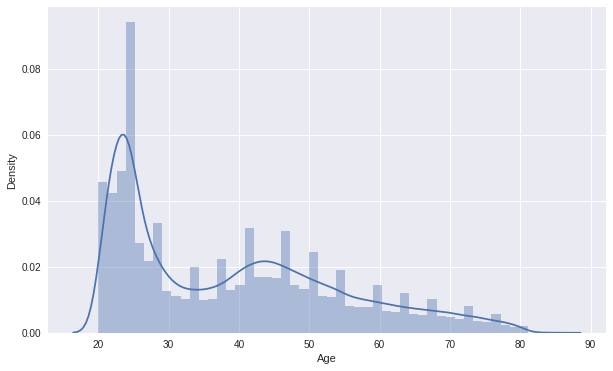

In [6]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn')
sns.distplot(df['Age'])
plt.show()

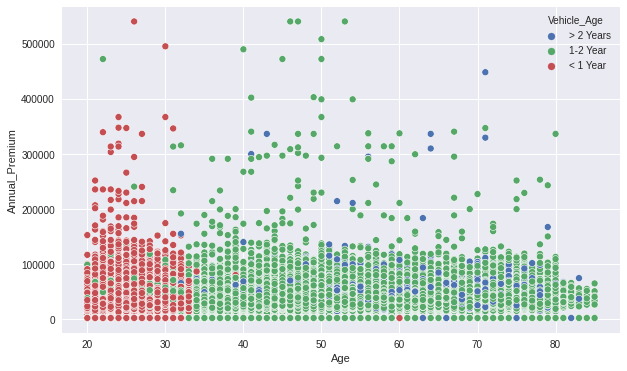

In [7]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn')
sns.scatterplot(data=df, y='Annual_Premium', x='Age', hue='Vehicle_Age')
plt.show()

In [8]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

## Detecting Outliers

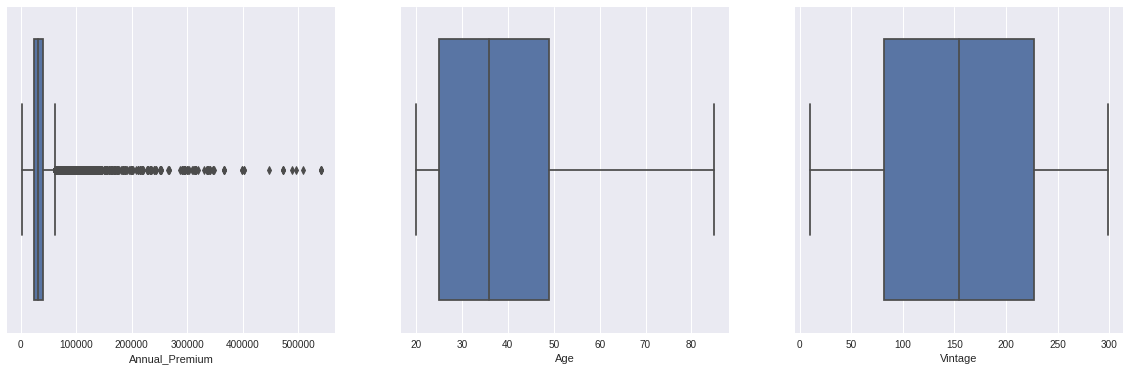

In [9]:
plt.figure(figsize=(20,6))

plt.style.use('seaborn')
plt.subplot(1,3,1)
sns.boxplot(x=df['Annual_Premium'])

plt.subplot(1,3,2)
sns.boxplot(x=df['Age'])

plt.subplot(1,3,3)
sns.boxplot(x=df['Vintage'])

plt.show()

### Detecting outliers

In [10]:
sup = df['Annual_Premium'].quantile(0.95)

In [11]:
inf = df['Annual_Premium'].quantile(0.05)

In [12]:
print(f"The upper and lower limits are: {inf} and {sup}")

The upper and lower limits are: 2630.0 and 55176.0


In [13]:
df2 = df[(df['Annual_Premium'] > inf) & (df['Annual_Premium'] < sup)]

In [14]:
df2.shape[0]

297174

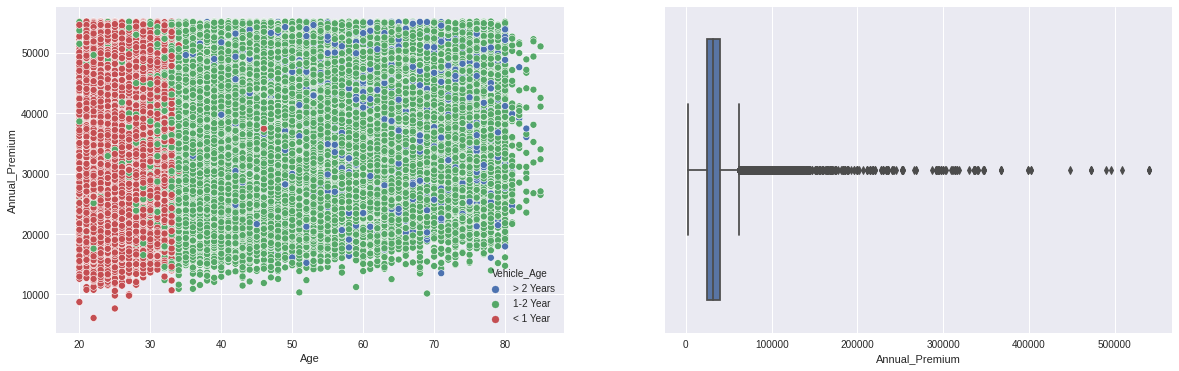

In [15]:
plt.figure(figsize=(20,6))
plt.style.use('seaborn')

plt.subplot(1,2,1)
sns.scatterplot(data=df2, y='Annual_Premium', x='Age', hue='Vehicle_Age')

plt.subplot(1,2,2)
sns.boxplot(x=df['Annual_Premium'])

plt.show()

### Distribution of the output variable

In [16]:
df2['Response'].value_counts()

0    261869
1     35305
Name: Response, dtype: int64

In [17]:
total_accepted = round((df2[df2['Response']==1].shape[0]/df2.shape[0])*100, 2)
total_not_accepted = round((100-total_accepted), 2)

print("The proportion of the output variable is {}/{}".format(total_accepted,total_not_accepted))
print("The output variable is unbalanced")

The proportion of the output variable is 11.88/88.12
The output variable is unbalanced


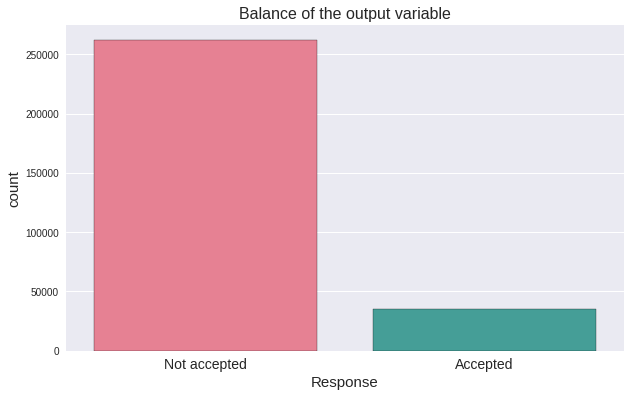

In [18]:
plt.figure(figsize=(10,6))

sns.countplot(x="Response", data = df2, palette ="husl" ,edgecolor="black")
plt.ylabel('count', fontsize=15)
plt.xlabel('Response', fontsize=15)
plt.xticks(ticks=[0,1], labels=['Not accepted', 'Accepted'], fontsize=14)
plt.title('Balance of the output variable', fontsize=16)
plt.show()

## Feature Engineering

### - Age range

In [19]:
df2['age_range'] = df2['Age'].apply(lambda x: 'Adult 1' if 20<x<30 else('Adult 2' if 30 < x < 40 else('Adult 3' if 40<x<65 else 'Elderly')))

### - Monthly premium

In [20]:
df2['monthly_premium'] = round(df2['Annual_Premium']/12, 2)

### - Percentage of total premium

In [21]:
df2['percentage_total_premium'] = df2['Annual_Premium']/df2['Annual_Premium'].sum()

In [22]:
df3 = pd.get_dummies(df2['Vehicle_Damage'], prefix='Vehicle_Damage').rename(columns={'vehicle_damage_0':'vehicle_damage_no', 'vehicle_damage_1':'vehicle_damage_yes'})

In [23]:
df4  = pd.concat([df2, df3], axis=1)

In [24]:
df4['insured_with_no_damage'] = df4['Previously_Insured']*df4['Vehicle_Damage_No']

In [25]:
df4["not_insured_with_damage"] = df4["Previously_Insured"].apply(lambda x: 1 if x == 0 else 0) * df4["Vehicle_Damage_Yes"]

In [26]:
df4["vehicle_age_<_1_year"] = df4["Vehicle_Age"].apply(lambda x: 1 if x=='< 1 Year' else 0)

In [27]:
df4["new_damage_no_insurance"] = df4["vehicle_age_<_1_year"]*df4["not_insured_with_damage"]

In [28]:
df4.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,...,Response,age_range,monthly_premium,percentage_total_premium,Vehicle_Damage_No,Vehicle_Damage_Yes,insured_with_no_damage,not_insured_with_damage,vehicle_age_<_1_year,new_damage_no_insurance
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,...,1,Adult 3,3371.17,0.000004,0,1,0,1,0,0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,...,0,Elderly,2794.67,0.000003,1,0,0,0,0,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,...,1,Adult 3,3191.17,0.000004,0,1,0,1,0,0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,...,0,Adult 1,2384.92,0.000003,1,0,1,0,1,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,...,0,Adult 1,2291.33,0.000003,1,0,1,0,1,0


In [29]:
numerical_features   = list(set(df4.select_dtypes(exclude='object').columns.values))
categorical_features = list(set(df4.select_dtypes(include='object').columns.values))

In [30]:
for i in df4[categorical_features].columns:
    print(f"The number of unique values of the column {i} --> {df4[i].nunique()}")
    print(f"The number of unique values of the column {i} --> {df4[i].unique()}")

The number of unique values of the column Vehicle_Damage --> 2
The number of unique values of the column Vehicle_Damage --> ['Yes' 'No']
The number of unique values of the column Gender --> 2
The number of unique values of the column Gender --> ['Male' 'Female']
The number of unique values of the column Vehicle_Age --> 3
The number of unique values of the column Vehicle_Age --> ['> 2 Years' '1-2 Year' '< 1 Year']
The number of unique values of the column age_range --> 4
The number of unique values of the column age_range --> ['Adult 3' 'Elderly' 'Adult 1' 'Adult 2']


In [31]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE 

def balance_data(df: pd.DataFrame, type: str) -> pd.DataFrame:
    
    new_df = df.copy()
    
    new_df['age_range']      = new_df['age_range'].apply(lambda x: 0 if x == 'Adult 1' else (1 if x == 'Adult 2' else (2 if x == 'Adult 3' else 3)))
    new_df['Gender']         = new_df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)
    new_df['Vehicle_Age']    = new_df['Vehicle_Age'].apply(lambda x: 0 if x == '< 1 Year' else (1 if x == '1-2 Year' else 2))
    new_df['Vehicle_Damage'] = new_df['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)
    
    y = new_df['Response'].copy()
    X = new_df.drop('Response', axis=1).copy()
    
    if type == 'ADASYN':
        adasyn = ADASYN() 
        X_adasyn, y_adasyn = adasyn.fit_resample(X,y)
        new_df2 = pd.concat([X_adasyn, y_adasyn], axis=1)
        
    else:
        smote = SMOTE()
        X_smote, y_smote = smote.fit_resample(X,y)
        new_df2 = pd.concat([X_smote, y_smote], axis=1)
        
    new_df2['age_range']      = new_df2['age_range'].apply(lambda x: 'a' if x == 0 else ('b' if x == 1 else ('c' if x == 2 else 'd')))
    new_df2['Gender']         = new_df2['Gender'].apply(lambda x: 'a' if x == 0 else 'b')
    new_df2['Vehicle_Age']    = new_df2['Vehicle_Age'].apply(lambda x: 'a' if x == 0 else ('b' if x == 1 else 'c'))
    new_df2['Vehicle_Damage'] = new_df2['Vehicle_Damage'].apply(lambda x: 'a' if x == 1 else 'b')
    
    return new_df2, X_smote, y_smote   

In [32]:
df5, X, y = balance_data(df4, 'SMOTE')

In [33]:
df4.shape[0], df5.shape[0]

(297174, 523738)

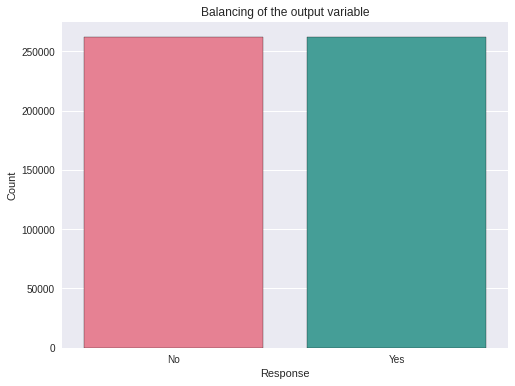

In [34]:
# sets the plot size
plt.figure(figsize=(8,6))

# counts each class for the target var
ax = sns.countplot(x=df5['Response'], palette ="husl", edgecolor="black")

# sets plot features
plt.title("Balancing of the output variable")
plt.xlabel("Response")
plt.ylabel("Count")
plt.xticks(ticks=[0,1], labels=['No','Yes'])

# displays the plot
plt.show()

In [35]:
# https://towardsdatascience.com/boruta-explained-the-way-i-wish-someone-explained-it-to-me-4489d70e154a

from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

def boruta(X: pd.DataFrame, y: pd.Series) -> list:

    ##initialize Boruta
    forest = RandomForestClassifier(
      n_jobs = -1, 
      max_depth = 5
    )

    boruta = BorutaPy(
      estimator = forest, 
      n_estimators = 'auto',
      max_iter = 20 # number of trials to perform
    )
    
    ## fit Boruta (it accepts np.array, not pd.DataFrame)
    boruta.fit(np.array(X), np.array(y))

    ## print results
    green_area = X.columns[boruta.support_].to_list()
    blue_area = X.columns[boruta.support_weak_].to_list()
        
    print('Number of features in the green area:', len(green_area))
    print('Number of features in the blue area:', len(blue_area))
    
    return green_area, blue_area

In [36]:
green_area, blue_area = boruta(X, y)

Number of features in the green area: 19
Number of features in the blue area: 0


In [37]:
green_area

['id',
 'Gender',
 'Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage',
 'age_range',
 'monthly_premium',
 'Vehicle_Damage_No',
 'Vehicle_Damage_Yes',
 'insured_with_no_damage',
 'not_insured_with_damage',
 'vehicle_age_<_1_year',
 'new_damage_no_insurance']

In [38]:
df6 = df5[green_area].copy()

# Model building

In [39]:
y = df5['Response'].copy()
X = df6.copy()

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=72)

In [77]:
all_scores = []

nominal_transformer = Pipeline(steps=[
('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
('ordinal', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
transformers=[
    ('cat_nom', nominal_transformer, ['Vehicle_Age', 'Gender']),
    ('ord_nom', ordinal_transformer, ['age_range', 'Vehicle_Damage'])
])

In [43]:
classifiers_list = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(verbosity=0),
    LGBMClassifier()
]

In [44]:
for classifier in classifiers_list:
    
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor), 
        ('minmaxscaler', MinMaxScaler()), 
        ("classifier", classifier)])
    
    pipe.fit(X_train, y_train)
    
    print("="*35)
    print(f"{str(classifier).split('(')[0]}")
    print("model score: %.3f" % pipe.score(X_val, y_val))

LogisticRegression
model score: 0.779
KNeighborsClassifier
model score: 0.763
DecisionTreeClassifier
model score: 0.801
RandomForestClassifier
model score: 0.801
XGBClassifier
model score: 0.801
LGBMClassifier
model score: 0.801


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [50]:
xgb_pipe = Pipeline(steps=[
    ("preprocessor", preprocessor), 
    ('minmaxscaler', MinMaxScaler()), 
    ("classifier"  , XGBClassifier())])

In [52]:
# param_grid = {'classifier__n_estimators' : [200,300,400],
#               'classifier__max_depth'    : [4,5,6],
#               'classifier__learning_rate': [0.01, 0.05]}
 
# xgb_grid = GridSearchCV(xgb_pipe, cv=KFold(n_splits = 5, shuffle=True), param_grid=param_grid, scoring='accuracy')
# xgb_grid.fit(X_train, y_train)
# best_xgb = xgb_grid.best_estimator_

# print(best_xgb)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_nom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle_Age', 'Gender']),
                                                 ('ord_nom',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['age_range',
                                                   'Vehicle_Damage'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtr...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',

# Best model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_nom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle_Age', 'Gender']),
                                                 ('ord_nom',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['age_range',
                                                   'Vehicle_Damage'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtr...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=300,
                               n_jobs=20, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [75]:
best_model =  Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_nom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle_Age', 'Gender']),
                                                 ('ord_nom',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['age_range',
                                                   'Vehicle_Damage'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1,
                               monotone_constraints='()', n_estimators=300,
                               n_jobs=20, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [79]:
best_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_nom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Vehicle_Age', 'Gender']),
                                                 ('ord_nom',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['age_range',
                                                   'Vehicle_Damage'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('classifier',
                 XGBClassifier(base_score=0.5, booster='gbtr...
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',

In [80]:
y_pred_best_model = best_model.predict(X_val)

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

In [82]:
print(classification_report(y_val, y_pred_best_model))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78     52279
           1       0.76      0.89      0.82     52469

    accuracy                           0.80    104748
   macro avg       0.81      0.80      0.80    104748
weighted avg       0.81      0.80      0.80    104748



In [83]:
from sklearn.metrics import plot_confusion_matrix

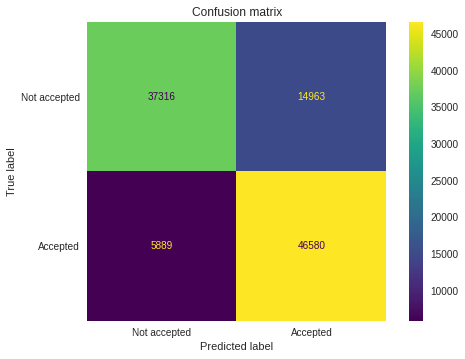

In [86]:
plot_confusion_matrix(best_model, X_val, y_val) 
plt.title('Confusion matrix')
plt.yticks(ticks=[0,1], labels=['Not accepted','Accepted'])
plt.xticks(ticks=[0,1], labels=['Not accepted','Accepted'])
plt.grid(False)
plt.show()

In [89]:
import scikitplot as skplt

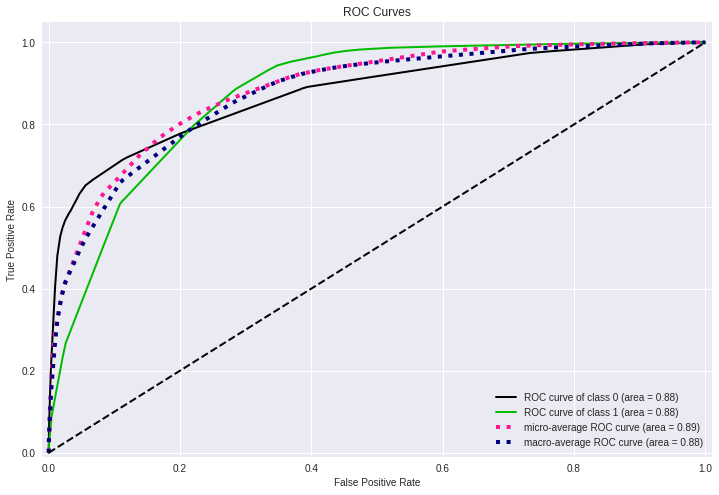

In [90]:
xgb_probs = best_model.predict_proba(X_val)

skplt.metrics.plot_roc(y_val, xgb_probs, figsize=(12,8))
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.05)
plt.show()

### Gains curve to check the quality of the model against the baseline(non-use of machine learning)

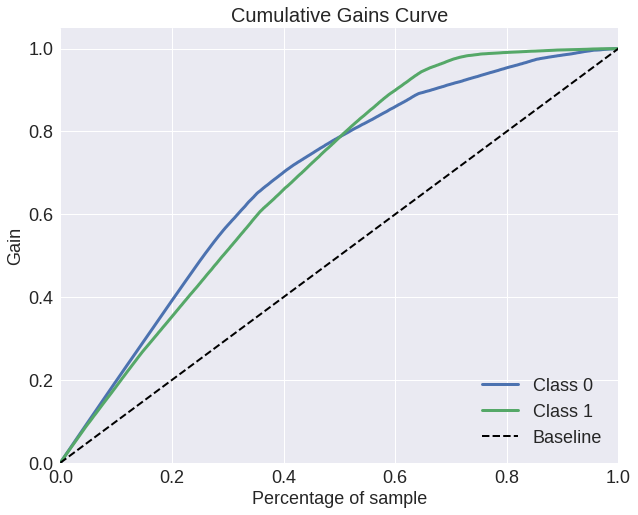

In [91]:
# get what the predicted probabilities are to use creating cumulative gains chart
probs = best_model.predict_proba(X_val)

skplt.metrics.plot_cumulative_gain(
    y_val, probs, figsize=(10, 8), title_fontsize=20, text_fontsize=18
)
plt.ylim(0,1.05)
plt.show()

### Lift curve to check the quality of the model against the baseline(non-use of machine learning)

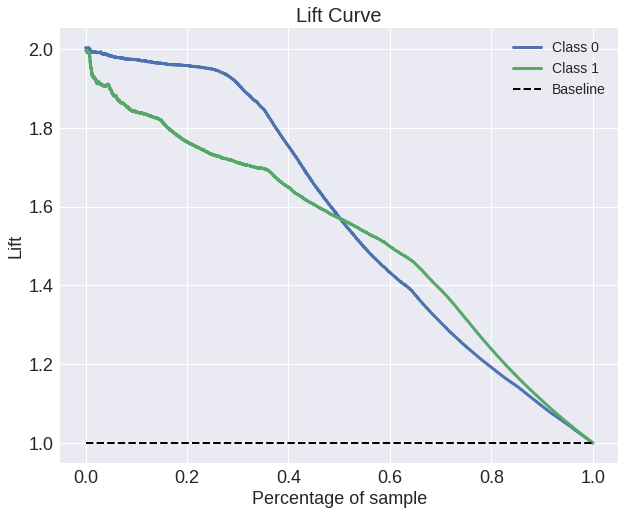

In [92]:
skplt.metrics.plot_lift_curve(
    y_val, probs, figsize=(10, 8), title_fontsize=20, text_fontsize=18
)
plt.legend(bbox_to_anchor=(1, 1), fontsize=14)
plt.show()

In [106]:
def validation_recall(model, x, y, n):

    # x => x_val
    # y -> y_val

    df = pd.concat([x,y], axis=1)
    new_df = df.sample(n, random_state=1)

    y = new_df['Response']
    x_val = new_df.drop('Response', axis=1)

    pred = model.predict(x_val)
    recall = recall_score(y, pred)

    return recall, x_val, y

### What percentage of customers interested in purchasing auto insurance will the sales team be able to reach by making 20,000 calls?

In [107]:
recall_20000, x_val_20000, y_20000 = validation_recall(best_model, X_val, y_val, 20000)

In [108]:
print('The recall considering 20000 call is: {}'.format(round(recall_20000, 4)))

The recall considering 20000 call is: 0.8835


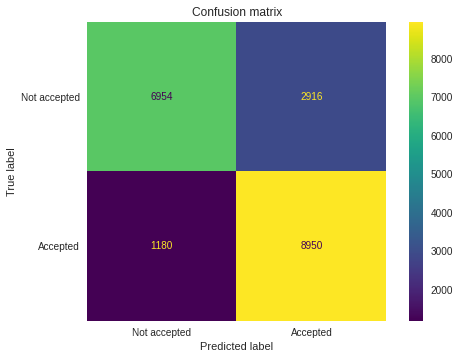

In [109]:
plot_confusion_matrix(best_model, x_val_20000, y_20000)
plt.title('Confusion matrix')
plt.yticks(ticks=[0,1], labels=['Not accepted','Accepted'])
plt.xticks(ticks=[0,1], labels=['Not accepted','Accepted'])
plt.grid(False)
plt.show()

In [110]:
6954 + 8950

15904

___

### what if the sales team's capacity increases to 40,000 calls, what percentage of customers interested in purchasing auto insurance will the sales team be able to contact?

In [113]:
recall_40000, x_val_40000, y_40000 = validation_recall(best_model, X_val, y_val, 40000)

In [114]:
print('The recall considering 40000 call is: {}'.format(round(recall_40000, 4)))

The recall considering 40000 call is: 0.887


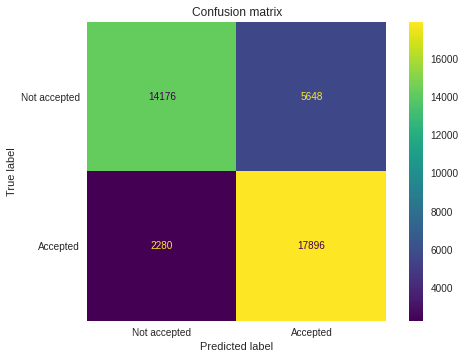

In [115]:
plot_confusion_matrix(best_model, x_val_40000, y_40000)
plt.title('Confusion matrix')
plt.yticks(ticks=[0,1], labels=['Not accepted','Accepted'])
plt.xticks(ticks=[0,1], labels=['Not accepted','Accepted'])
plt.grid(False)
plt.show()

___

### How many calls does the sales team need to make to contact 80% of customers interested in purchasing auto insurance?

In [116]:
all_customers_interested = pd.DataFrame(y_pred_best_model)

In [117]:
# 80% of all customers interested in purchasing auto insurance

all_customers_interested.value_counts()[1]*0.8

49234.4

___

# Summary

### - What percentage of customers interested in purchasing auto insurance will the sales team be able to reach by making 20,000 calls?

### Recall 0.8835


### - what if the sales team's capacity increases to 40,000 calls, what percentage of customers interested in purchasing auto insurance will the sales team be able to contact?

### Recall 0.887


### - How many calls does the sales team need to make to contact 80% of customers interested in purchasing auto insurance?

### 49234 calls

___